# Projeto 3 - Predição de varíavel quantitativa

----
## Introdução

Quando se trata de viagens, seja a passeio ou a trabalho, um cronograma pré-determinado é essencial para a organização da viagem. Entretanto, por mais que um cronograma seja montado pensando nas mais diversas variáveis, o atraso de voos nos aeroportos tende a pegar os viajantes de surpresa, sendo um dos mais frequentes fatores de alteração no cronograma dos viajantes. 

Pensando nisso, o objetivo deste projeto é criar um **modelo de predição de atrasos de voos domésticos nos EUA**, utilizando um dataset que contém informações de todos os voos domésticos ocorridos em 2023. Visando aumentar o desempenho do modelo, escolhemos prever o atraso dos voos apenas do **aeroporto de Atlanta**, de onde sairam a maior quantidade de voos em 2023. A variável principal (target), portanto, é o atraso total do voo em minutos..

O modelo será desenvolvido com o intuito de fornecer insights e previsões precisas sobre os atrasos de voos, auxiliando na tomada de decisões e no planejamento de viagens aéreas. Para isso, o projeto foi dividido em algumas etapas, sendo elas:

1) Descrição do dataset
2) Importação e tratamento do dataset
3) Análise exploratória dos dados
4) Divisão dos dados em treino e teste
5) Construção do modelo de predição
6) Avaliação do modelo
7) Conclusão
8) Bibliografia


----
## 1) Descrição do dataset

### Limpeza

Os dados utilizados neste projeto foram obtidos na plataforma Kaggle e contém informações sobre todos os voos domésticos ocorridos nos EUA em 2023. O dataset é composto por 6.743.404 linhas e 24 colunas, sendo que cada linha representa um voo e cada coluna representa uma variável.

Devido ao tamanho do dataset, foi necessário realizar um pré-processamento dos dados para que fosse possível realizar a análise exploratória e a construção do modelo de predição. O pré-processamento consistiu nas seguintes etapas:

1) Filtragem do dataset para conter apenas os voos que partiram de Atlanta;
2) Análise das variáveis e remoção das colunas que não seriam utilizadas no modelo, sendo elas²:
    1) Descrição do avião (detalhes técnicos do modelo dos aviões);
    2) Nome das cidades de partida e chegada (código do aeroporto é mais relevante e o ponto de partida sempre será o aeroporto de Atlanta);
    3) Duração do voo (a duração exata do voo gera uma informação pouco relevante, sendo mais eficiente análisar o tipo da duração do voo);
3) Alterar a variável da data completa dos voos para apenas o mês dos voos, facilitando a generalização do modelo.  

### Descrição de variáveis

| Atributos | Descrição | Possíveis Valores |
|------|------|------|
|   Month  | Mês em que os voos foram realizados | 1 a 12 |
|   Day_Of_Week  | Dia da semana em que os voos foram realizados | 1 a 7 |
|   Airline  | Nome da companhia aérea | Southwest Airlines Co., Delta Air Lines Inc, American Airlines Inc., United Air Lines Inc., Skywest Airlines Inc., Republic Airways, JetBlue Airways, Spirit Air Lines, Alaska Airlines Inc., American Eagle Airlines Inc., Endeavor Air, PSA Airlines, Frontier Airlines Inc., Allegiant Air, Hawaiian Airlines Inc.
|   DepTime_label  | Período de partida dos voos | Morning, Afternon, Evening, Night |
|   Dep_Delay  | Atraso na partida dos voos | Quantidade de minutos | 
|   Dep_Delay_Tag  | Tag de atraso na partida dos voos | 0: Sem atraso ou atrasos menores que 5 minutos; 1: Atrasos maiores que 5 minutos |
|   Dep_Delay_Type  | Tipo de atraso na partida dos voos | Low <5min, Medium >15min, Hight >60min |
|   Arr_Airport  | Aeroporto de chegada dos voos | Código do aeroporto |
|   Arr_Delay  | Atraso na chegada dos voos | Quantidade de minutos |
|   Distance_type  | Tipo de voo baseado na distância | Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi |
|   Delay_Carrier  | Atraso causado pela companhia aérea | Quantidade de minutos |
|   Delay_Weather  | Atraso causado por condições climáticas | Quantidade de minutos |
|   Delay_NAS  | Atraso causado por problemas no controle de tráfego aéreo | Quantidade de minutos |
|   Delay_Security  | Atraso causado por problemas de segurança | Quantidade de minutos |
|   Delay_LastAircraft  | Atraso causado por outro avião | Quantidade de minutos |
|   **Total_Delay**   | Atraso total do voo | Quantidade de minutos |

- **Target**: Prever o valor da variável **Total_Delay** (tempo total de atraso do voo) é o principal objetivo do modelo, sendo portanto a o target.
- **Features**: A partir da análise exploratória, será demonstrada a relevância de cada uma
    - **Month**: Diferentes períodos do ano têm influência na quantidade e duração de atrasos em voos.
    - **Airline**: Diferentes companhias aéreas têm maior tendência a cometerem atrasos, devido à organização da operação.
    - **DepTime_label**: Em cada período do dia, a operação sofre mudanças, o que pode causar atrasos.
    - **Arr_Airport**: O aeroporto de destino pode influenciar o atraso na chegada, dependendo de fatores como o controle de tráfego aéreo
    - **Distance_Type**: Os preparativos para um voo dependem principalmente de sua duração. Tais preparativos podem ocasionar em atrasos na partida.

----
## 2) Importação e tratamento do dataset
Nesta seção será implementada a preparação proposta no item 1.

In [54]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

In [55]:
# Leitura do dataset
dados = pd.read_csv('US_flights_2023.csv')


### Limpeza e pré-processamento de dados

In [56]:
# Obtendo os dados do aerorpot de Atlanta (ATL)
dados = dados.loc[dados.Dep_Airport == 'ATL', :]

# Verificando os dados
dados.columns, dados.shape, dados.dtypes

(Index(['FlightDate', 'Day_Of_Week', 'Airline', 'Tail_Number', 'Dep_Airport',
        'Dep_CityName', 'DepTime_label', 'Dep_Delay', 'Dep_Delay_Tag',
        'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName', 'Arr_Delay',
        'Arr_Delay_Type', 'Flight_Duration', 'Distance_type', 'Delay_Carrier',
        'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft',
        'Manufacturer', 'Model', 'Aicraft_age'],
       dtype='object'),
 (332935, 24),
 FlightDate            object
 Day_Of_Week            int64
 Airline               object
 Tail_Number           object
 Dep_Airport           object
 Dep_CityName          object
 DepTime_label         object
 Dep_Delay              int64
 Dep_Delay_Tag          int64
 Dep_Delay_Type        object
 Arr_Airport           object
 Arr_CityName          object
 Arr_Delay              int64
 Arr_Delay_Type        object
 Flight_Duration        int64
 Distance_type         object
 Delay_Carrier          int64
 Delay_Weather          in

In [57]:
# Descartando colunas que não serão utilizadas
columns_to_drop = ['Tail_Number', 'Dep_CityName', 'Arr_CityName','Arr_Delay_Type', 'Flight_Duration', 'Manufacturer', 'Model', 'Aicraft_age', 'Dep_Airport']

for column in columns_to_drop:
    dados = dados.drop(column, axis=1)

In [58]:
# Adaptando as colunas para o tipo correto
dados.Day_Of_Week = dados.Day_Of_Week.astype('category')
dados.Dep_Delay_Tag = dados.Dep_Delay_Tag.astype('category')

# Substituindo os valores categóricos por valores numéricos
dados.Dep_Delay_Type = dados.Dep_Delay_Type.astype('category') # Tipo do atraso na partida
dados['Dep_Delay_Type'] = dados['Dep_Delay_Type'].cat.rename_categories({'Low <5min': 0, 'Medium >15min': 1, 'Hight >60min': 2})

dados.Distance_type = dados.Distance_type.astype('category') # Tipo da distância
dados['Distance_type'] = dados['Distance_type'].cat.rename_categories({'Short Haul >1500Mi': 0, 'Medium Haul <3000Mi': 1, 'Long Haul <6000Mi': 2})

# Substituindo a data do voo pelo mês
dados['FlightDate'] = pd.to_datetime(dados['FlightDate']).dt.month
dados.rename(columns={'FlightDate': 'Month'}, inplace=True)

# Adicionando a coluna de atraso total
dados['Total_Delay'] = dados['Dep_Delay'] + dados['Arr_Delay']

# Verificando os dados
display(dados.head(5))
display(dados.columns)
display(dados.shape)

,Month,Day_Of_Week,Airline,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_Delay,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Total_Delay
31,1,1,Endeavor Air,Afternoon,-3,0,0,FAY,-12,0,0,0,0,0,0,-15
32,1,2,Endeavor Air,Afternoon,-5,0,0,FAY,-12,0,0,0,0,0,0,-17
33,1,3,Endeavor Air,Afternoon,-2,0,0,FAY,-7,0,0,0,0,0,0,-9
34,1,4,Endeavor Air,Afternoon,16,1,1,FAY,11,0,0,0,0,0,0,27
35,1,5,Endeavor Air,Afternoon,-3,0,0,FAY,-8,0,0,0,0,0,0,-11


Index(['Month', 'Day_Of_Week', 'Airline', 'DepTime_label', 'Dep_Delay',
       'Dep_Delay_Tag', 'Dep_Delay_Type', 'Arr_Airport', 'Arr_Delay',
       'Distance_type', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS',
       'Delay_Security', 'Delay_LastAircraft', 'Total_Delay'],
      dtype='object')

(332935, 16)

----
## 3) Análise exploratória dos dados

### 3.1) Análise univariada

#### Análise univariada qualitiva
Análise individual de variáveis qualitativas 

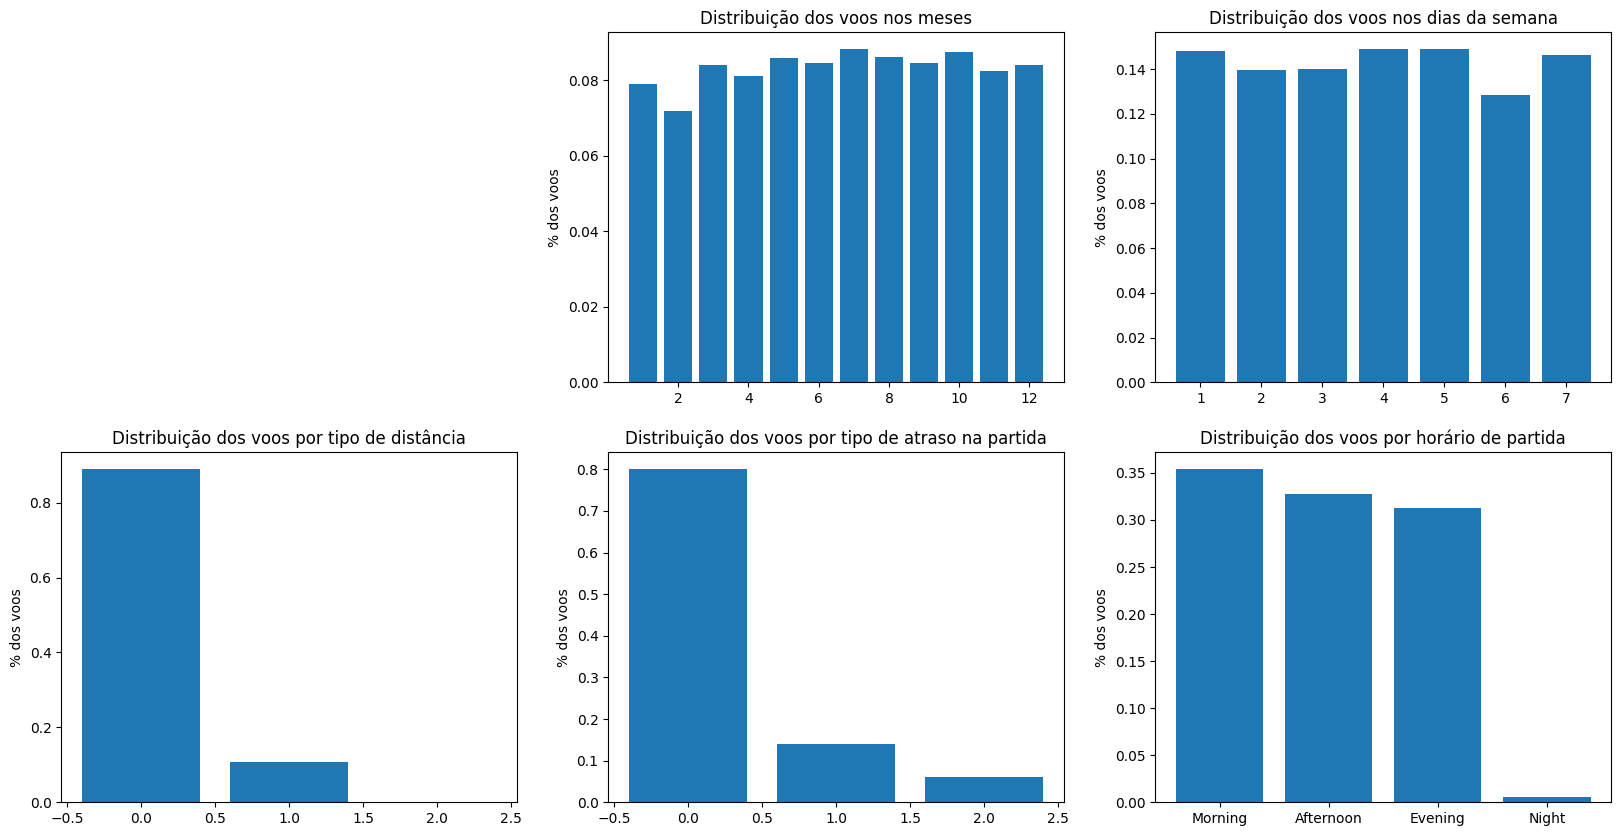

In [59]:
contagem = {}
for column in dados.columns:
    if dados[column].dtype.name != 'int64':
        contagem[column] = dados[column].value_counts(True)

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 2)
plt.bar(contagem['Month'].index, contagem['Month'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos meses')

plt.subplot(2, 3, 3)
plt.bar(contagem['Day_Of_Week'].index, contagem['Day_Of_Week'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos nos dias da semana')

plt.subplot(2, 3, 4)
plt.bar(contagem['Distance_type'].index, contagem['Distance_type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de distância')

plt.subplot(2, 3, 5)
plt.bar(contagem['Dep_Delay_Type'].index, contagem['Dep_Delay_Type'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por tipo de atraso na partida')

plt.subplot(2, 3, 6)
plt.bar(contagem['DepTime_label'].index, contagem['DepTime_label'].values)
plt.ylabel('% dos voos')
plt.title('Distribuição dos voos por horário de partida')

plt.show()


- **Companhias áereas**: Há claramente um domínio de mercado pela companhia Delta Airlines.
- **Análise temporal**: Durante a semana, observa-se pouca variação entre a quantidade de voos. Da mesma forma, durante o ano, só se nota uma alteração sutíl no mês de julho, o que pode ser explicado pelas férias que geralmente ocorrem nesse período. Por outra lado, analisando os horários dos voos, observa-se preferência grande por voos não noturnos.
- **Distância**: A maioria dos voos constituem trajetos curtos (<1500 milhas) ou médios (<3000 milhas). Uma parte pequena é composta por voos longos, o que pode ser explicado pelo fato de se tratarem de voos domésticos.
- **Frequência dos atrasos**: Em aproxidamente 80% dos casos, não ocorrem atrasos significativos (<5 min) no aeroporto de Atlanta. Quando ocorrem, entretanto, é mais provavél encontrar um atraso médio.

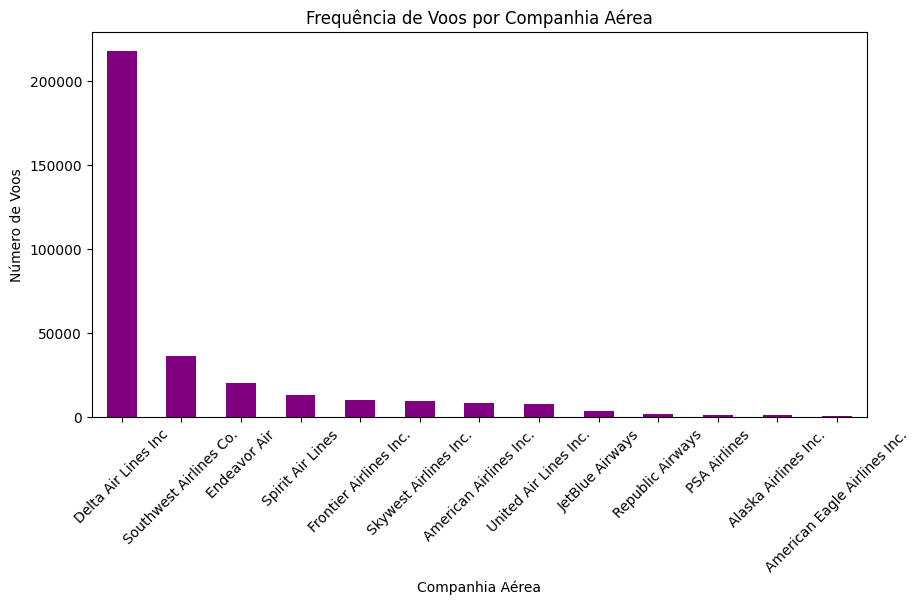

In [60]:
plt.figure(figsize=(10, 5))
dados['Airline'].value_counts().plot(kind='bar', color='purple')
plt.title('Frequência de Voos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos')
plt.xticks(rotation=45)
plt.show()

Há claramente uma dominância de mercado da Delta Airlines.

#### Análise univariada quantitativa
Análise individual de variáveis quantitativas

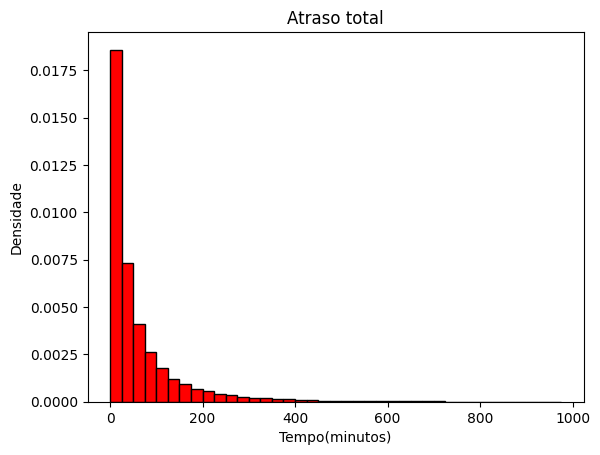

In [61]:
faixa = np.arange(0, 1000, 25)

plt.hist(dados['Total_Delay'].dropna(), bins=faixa, color='red', edgecolor='black', density=True)
plt.title('Atraso total')
plt.xlabel('Tempo(minutos)')
plt.ylabel('Densidade')
plt.show()

- De maneira geral, o atraso total dificilmente será maior que 200 minutos. 

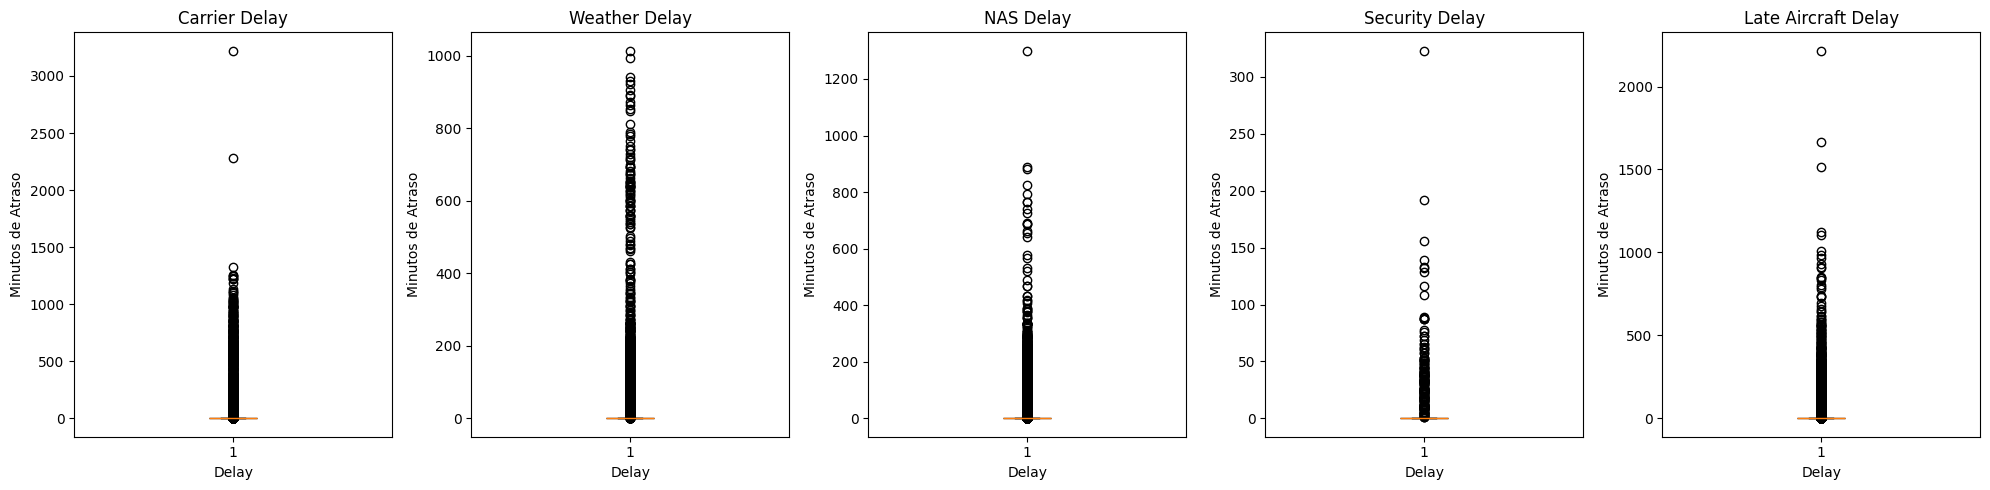

In [68]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
delay_types = ['Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft']
delay_titles = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
for i, delay in enumerate(delay_types):
    ax[i].boxplot(dados[delay].dropna(), patch_artist=True)
    ax[i].set_title(delay_titles[i])
    ax[i].set_xlabel('Delay')
    ax[i].set_ylabel('Minutos de Atraso')
plt.tight_layout()
plt.show()

- Para todos as componentes do atraso de partida, observa-se a mesma tendência: a grande maioria tem o valor 0, visto que a maioria dos voos não têm atraso. 
- Entre os voos atrasados:
    - **Carrier Delay**: Varia entre 0 e aprox. 1200. Valores acima configuram outliers
    - **Weather Delay**: Somente valores acima de 800 configuram outliers, tendo uma distribuição mais homogênea.
    - **NAS Delay**: Varia entre 0 e 400. Valores acima configuram outliers
    - **Security Delay**: Sendo o menos frequente e menos significativo, varia entre 0 e aprox. 80. Valores acima configuram outliers.
    - **Late Aircraft Delay**: Varia de 0 e 800. Valores acima configuram outliers.

### 3.2) Análise multivariada

#### Correlação entre as componentes e o tempo total de atraso de um voo

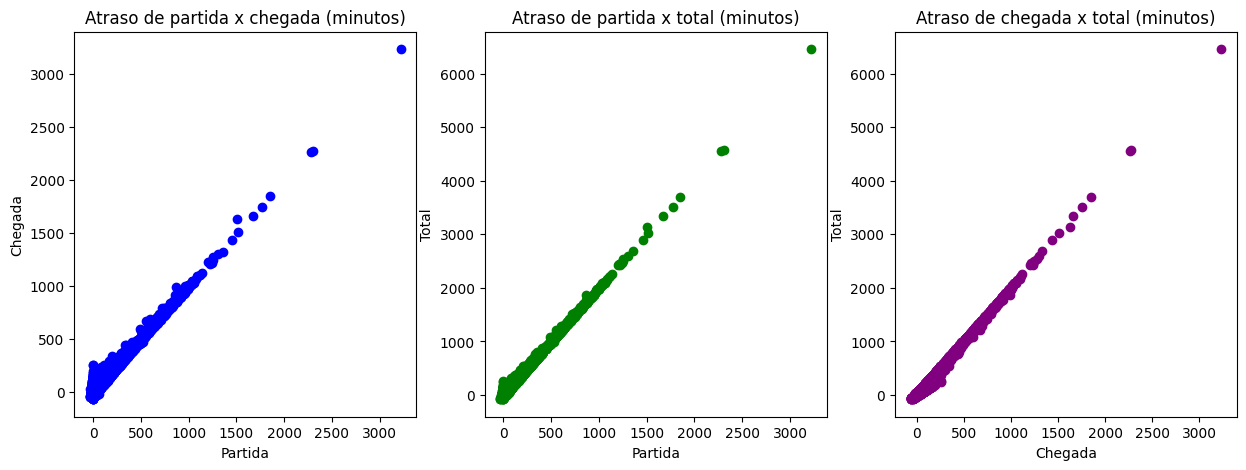

Correlação linear entre partida e chegada: 0.966853298475312
Correlação linear entre partida e total: 0.9913137497116205
Correlação linear entre chegada e total: 0.9920358553844639


In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dados['Dep_Delay'], dados['Arr_Delay'], color='blue')
plt.title('Atraso de partida x chegada (minutos)')
plt.xlabel('Partida')
plt.ylabel('Chegada')

plt.subplot(1, 3, 2)
plt.scatter(dados['Dep_Delay'], dados['Total_Delay'], color='green')
plt.title('Atraso de partida x total (minutos)')
plt.xlabel('Partida')
plt.ylabel('Total')

plt.subplot(1, 3, 3)
plt.scatter(dados['Arr_Delay'], dados['Total_Delay'], color='purple')
plt.title('Atraso de chegada x total (minutos)')
plt.xlabel('Chegada')
plt.ylabel('Total')

plt.show()

print('Correlação linear entre partida e chegada:', dados['Dep_Delay'].corr(dados['Arr_Delay']))
print('Correlação linear entre partida e total:', dados['Dep_Delay'].corr(dados['Total_Delay']))
print('Correlação linear entre chegada e total:', dados['Arr_Delay'].corr(dados['Total_Delay']))

- O atraso na partida está fortemente relacionado ao atraso na chegada (visto pelo coeficiente de correlação linear), indicando que o atraso se propaga durante o processo. da mesma forma, o atraso na partida e na chegada estão fortemente relacionados com atraso total, analisando individualmente.

#### Análise do atraso de acordo com a companhia aérea e o dia da semana

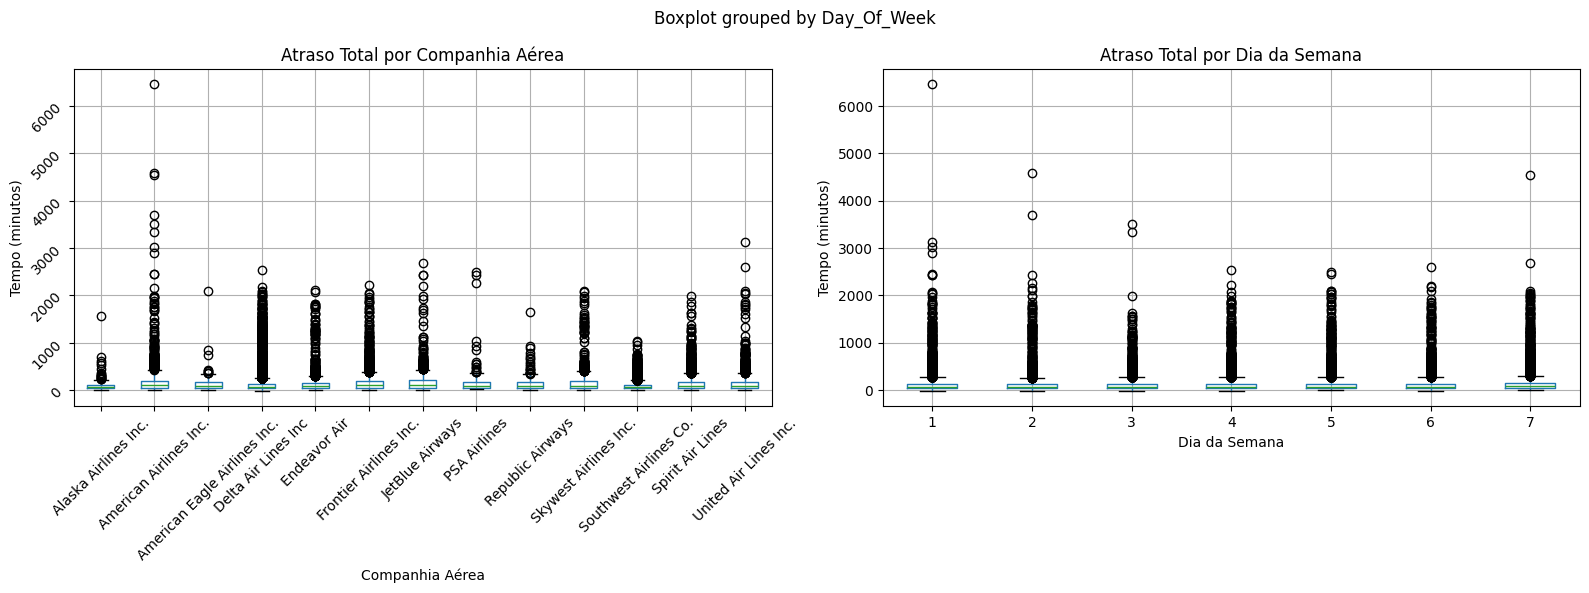

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Airline', ax=ax[0])
ax[0].set_title('Atraso Total por Companhia Aérea')
ax[0].set_xlabel('Companhia Aérea')
ax[0].set_ylabel('Tempo (minutos)')
ax[0].tick_params(labelrotation=45)

dados.loc[dados.Dep_Delay_Type != 0, :].boxplot(column='Total_Delay', by='Day_Of_Week', ax=ax[1])
ax[1].set_title('Atraso Total por Dia da Semana')
ax[1].set_xlabel('Dia da Semana')
ax[1].set_ylabel('Tempo (minutos)')

plt.tight_layout()
plt.show()

- **Companhias Aéreas**: A maior companhia do segmento é a que apresenta não só mais atrasos como também o maior intervalo de atrasos, desconsiderando outliers. Isso pode indicar que a companhia tem problemas em atender à demanda de voos domésticos.
- **Dias da Semana**: Com exceção do terceiro dia da semana, que apresenta uma faixa de atraso sutilmente menor que os outros dias, não parece haver uma tendência específica relacionada ao dia da semana que o voo ocorre.

#### Análise por período do ano

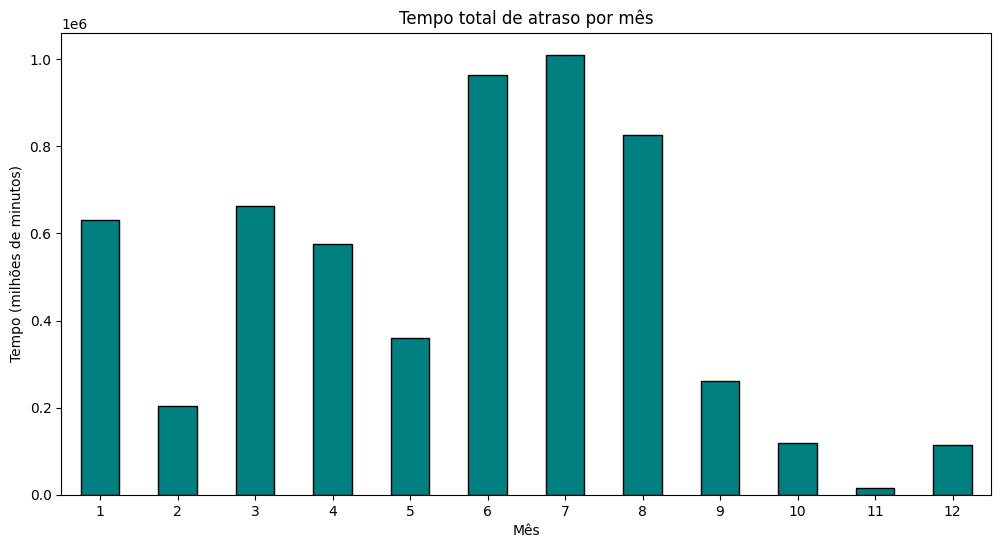

In [77]:
plt.figure(figsize=(12, 6))
monthly_delays = dados.groupby('Month')['Total_Delay'].sum()
monthly_delays.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Tempo total de atraso por mês')
plt.xlabel('Mês')
plt.ylabel('Tempo (milhões de minutos)')
plt.xticks(rotation=0)
plt.show()

- Coletivamente, o mês de julho é o mês com mais atraso total. Isso é um indicador importante, dado que a diferença no volume de voos, como foi analisado anteriormente, não se comporta da mesma forma que a diferença no atraso total entre os meses (observe julho e novembro, por exemplo). Por outro lado, a provavel explicação é o maior volume de voos nesse período de férias.

----
## Bibliografia

1. Fonte do dataset: https://www.kaggle.com/datasets/bordanova/2023-us-civil-flights-delay-meteo-and-aircraft (dados fornecidos pelo Bureau of Transportation Statistics)
2. L. Carvalho, A. Sternberg, L. Maia Gonçalves, A. Beatriz Cruz, J.A. Soares, D. Brandão, D. Carvalho, e E. Ogasawara, 2020, On the relevance of data science for flight delay research: a systematic review, Transport Reviews. Acesso em 12 de maio de 2024.